In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import re

from scipy import stats
from functools import reduce

# Some matplotlib options
%matplotlib inline
matplotlib.style.use("ggplot")

pd.set_option('display.max_colwidth', -1)  # Show the entire column 
pd.options.display.max_columns = 100 
pd.options.display.max_rows = 10000 

# Seaborn options
sns.set_style("whitegrid")

In [22]:
hr = pd.read_csv("hranalytics.csv")

In [23]:
hr

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,0,0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94.0,3,2,Sales Executive,4.0,Single,5993.0,19479,8,Yes,11.0,3,1,0,8,0,1,6,4,0,5
1,1,1,1,1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61.0,2,2,Research Scientist,2.0,Married,5130.0,24907,1,No,23.0,4,4,1,10,3,3,10,7,1,7
2,2,2,2,2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92.0,2,1,Laboratory Technician,3.0,Single,2090.0,2396,6,Yes,15.0,3,2,0,7,3,3,0,0,0,0
3,3,3,3,3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56.0,3,1,Research Scientist,3.0,Married,2909.0,23159,1,Yes,11.0,3,3,0,8,3,3,8,7,3,0
4,4,4,4,4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40.0,3,1,Laboratory Technician,2.0,Married,3468.0,16632,9,No,12.0,3,4,1,6,3,3,2,2,2,2
5,5,5,5,5,5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79.0,3,1,Laboratory Technician,4.0,Single,3068.0,11864,0,No,13.0,3,3,0,8,2,2,7,7,3,6
6,6,6,6,6,6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81.0,4,1,Laboratory Technician,1.0,Married,2670.0,9964,4,Yes,20.0,4,1,3,12,3,2,1,0,0,0
7,7,7,7,7,7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,67.0,3,1,Laboratory Technician,3.0,Divorced,2693.0,13335,1,No,22.0,4,2,1,1,2,3,1,0,0,0
8,8,8,8,8,8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,44.0,2,3,Manufacturing Director,3.0,Single,9526.0,8787,0,No,21.0,4,2,0,10,2,3,9,7,1,8
9,9,9,9,9,9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,94.0,3,2,Healthcare Representative,3.0,Married,5237.0,16577,6,No,13.0,3,2,2,17,3,2,7,7,7,7


In [24]:
print(hr.shape)
before_dedup = hr.shape[0]
hr.describe(include='all')

(1470, 36)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,2,3,NaN,3,NaN,NaN,6,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,734.500000,734.500000,734.500000,734.500000,734.500000,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,424.496761,424.496761,424.496761,424.496761,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,367.250000,367.250000,367.250000,367.250000,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,734.500000,734.500000,734.500000,734.500000,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,1101.750000,1101.750000,1101.750000,1101.750000,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [25]:
hr.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,0,0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94.0,3,2,Sales Executive,4.0,Single,5993.0,19479,8,Yes,11.0,3,1,0,8,0,1,6,4,0,5
1,1,1,1,1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61.0,2,2,Research Scientist,2.0,Married,5130.0,24907,1,No,23.0,4,4,1,10,3,3,10,7,1,7
2,2,2,2,2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92.0,2,1,Laboratory Technician,3.0,Single,2090.0,2396,6,Yes,15.0,3,2,0,7,3,3,0,0,0,0
3,3,3,3,3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56.0,3,1,Research Scientist,3.0,Married,2909.0,23159,1,Yes,11.0,3,3,0,8,3,3,8,7,3,0
4,4,4,4,4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40.0,3,1,Laboratory Technician,2.0,Married,3468.0,16632,9,No,12.0,3,4,1,6,3,3,2,2,2,2


In [26]:
print(np.count_nonzero(hr.isnull().values))
print(hr.isnull().any())

# Checking for duplicates
print(hr[hr.duplicated(keep=False)].shape)


hr = hr.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


hr.dtypes

0
Unnamed: 0                  False
Unnamed: 0.1                False
Unnamed: 0.1.1              False
Unnamed: 0.1.1.1            False
Unnamed: 0.1.1.1.1          False
Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StockOptionLevel            False
TotalWorking

Unnamed: 0                  int64  
Unnamed: 0.1                int64  
Unnamed: 0.1.1              int64  
Unnamed: 0.1.1.1            int64  
Unnamed: 0.1.1.1.1          int64  
Age                         int64  
Attrition                   object 
BusinessTravel              object 
DailyRate                   int64  
Department                  object 
DistanceFromHome            int64  
Education                   int64  
EducationField              object 
EnvironmentSatisfaction     int64  
Gender                      object 
HourlyRate                  float64
JobInvolvement              int64  
JobLevel                    int64  
JobRole                     object 
JobSatisfaction             float64
MaritalStatus               object 
MonthlyIncome               float64
MonthlyRate                 int64  
NumCompaniesWorked          int64  
OverTime                    object 
PercentSalaryHike           float64
PerformanceRating           int64  
RelationshipSatisfaction    

In [27]:

hr.dropna(axis=0, inplace=True)


hr.drop_duplicates(inplace=True)


print("Duplicates Removed: " + str(before_dedup - hr.shape[0]))
hr.describe()


Duplicates Removed: 0


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,734.500000,734.500000,734.500000,734.500000,734.500000,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,424.496761,424.496761,424.496761,424.496761,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,367.250000,367.250000,367.250000,367.250000,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,734.500000,734.500000,734.500000,734.500000,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,1101.750000,1101.750000,1101.750000,1101.750000,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [28]:
hr['JobSatisfaction'].value_counts()

4.0    459
3.0    442
1.0    289
2.0    280
Name: JobSatisfaction, dtype: int64

In [29]:
hr['JobSatisfaction'].unique()

array([4., 2., 3., 1.])

In [30]:

cols = ['JobSatisfaction', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike']
hr[cols] = hr[cols].applymap(np.float64)


In [31]:

for col in hr:
    print(col)
    print(hr[col].unique())

Unnamed: 0
[   0    1    2 ... 1467 1468 1469]
Unnamed: 0.1
[   0    1    2 ... 1467 1468 1469]
Unnamed: 0.1.1
[   0    1    2 ... 1467 1468 1469]
Unnamed: 0.1.1.1
[   0    1    2 ... 1467 1468 1469]
Unnamed: 0.1.1.1.1
[   0    1    2 ... 1467 1468 1469]
Age
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
Attrition
['Yes' 'No']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
DailyRate
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  8

In [32]:
hr.to_csv("hranalytics.csv")

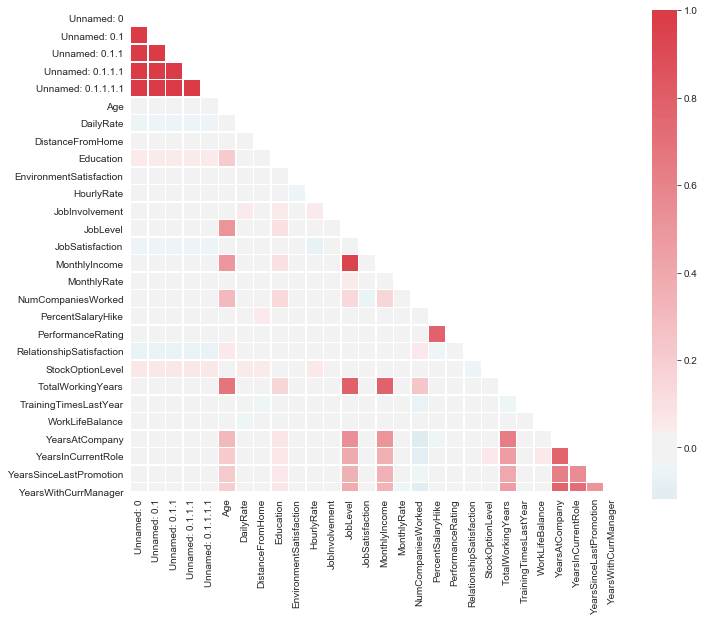

In [33]:

numeric_hr = hr.select_dtypes(include=[np.number])

# Compete the correlation matrix
corr = numeric_hr._get_numeric_data().corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, center=0.0,
                      vmax = 1, square=True, linewidths=.5, ax=ax)
plt.savefig('corr-heat.png')
plt.show()

In [34]:
numeric_hr = numeric_hr.drop(["HourlyRate","DailyRate", "MonthlyRate"], 1)

In [35]:
hr.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,734.500000,734.500000,734.500000,734.500000,734.500000,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,424.496761,424.496761,424.496761,424.496761,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,367.250000,367.250000,367.250000,367.250000,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,734.500000,734.500000,734.500000,734.500000,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,1101.750000,1101.750000,1101.750000,1101.750000,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


No     1233
Yes    237 
Name: Attrition, dtype: int64


No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

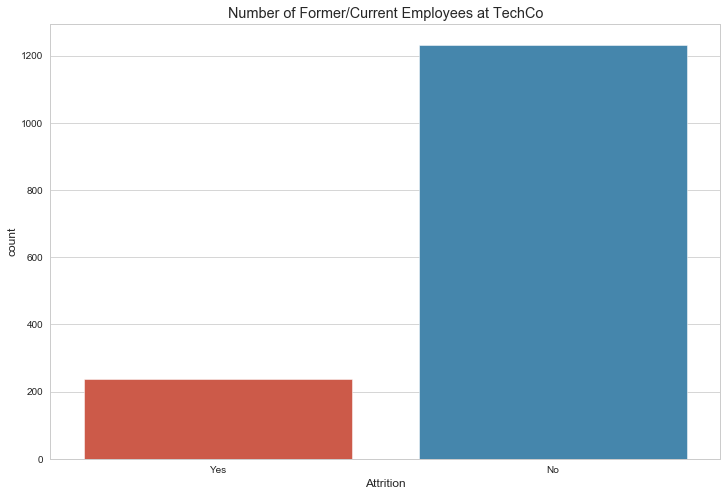

In [36]:
print(hr.Attrition.value_counts())

# Easier to join all leaver together for my analyses considering there are very few terminations
hr['Attrition'] = hr['Attrition'].replace("Termination", "Voluntary Resignation")
hr['Attrition'] = hr['Attrition'].replace("Voluntary Resignation", "Former Employees")
hr['Attrition'] = hr['Attrition'].replace("Current employee", "Current Employees")

plt.figure(figsize=(12,8))
plt.title('Number of Former/Current Employees at TechCo')
sns.countplot(x="Attrition", data=hr)
hr['Attrition'].value_counts()/hr['Attrition'].count()*100

In [37]:
temp3 = pd.crosstab([hr.Department,hr.Gender,hr.MaritalStatus,hr.WorkLifeBalance], hr['Attrition'])
print(temp3)
income_pivot = hr.pivot_table(values=["MonthlyIncome"], index=["Gender","MaritalStatus","WorkLifeBalance"], aggfunc=[np.mean, np.std])
print(income_pivot)


Attrition                                                     No  Yes
Department             Gender MaritalStatus WorkLifeBalance          
Human Resources        Female Divorced      2                0    2  
                                            3                1    1  
                              Married       1                1    0  
                                            3                6    3  
                                            4                1    0  
                              Single        3                3    0  
                                            4                2    0  
                       Male   Divorced      2                2    0  
                                            3                6    2  
                                            4                2    0  
                              Married       1                2    0  
                                            2                1    0  
                    

C:\Users\Shubham\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Shubham\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Shubham\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


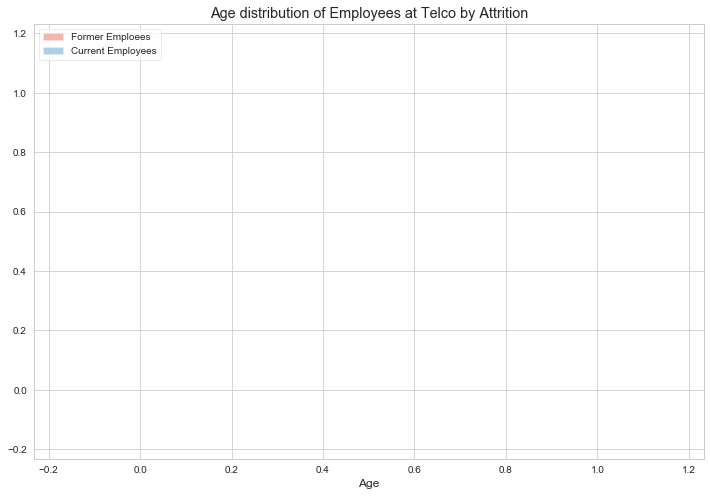

In [38]:
plt.figure(figsize=(12,8))
plt.title('Age distribution of Employees at Telco by Attrition')
sns.distplot(hr.Age[hr.Attrition == 'Former Employees'], bins = np.linspace(1,70,35))
sns.distplot(hr.Age[hr.Attrition == 'Current Employees'], bins = np.linspace(1,70,35))
#sns.distplot(hr.Age[hr.Attrition == 'Termination'], bins = np.linspace(0,70,35))
plt.legend(['Former Emploees','Current Employees'])

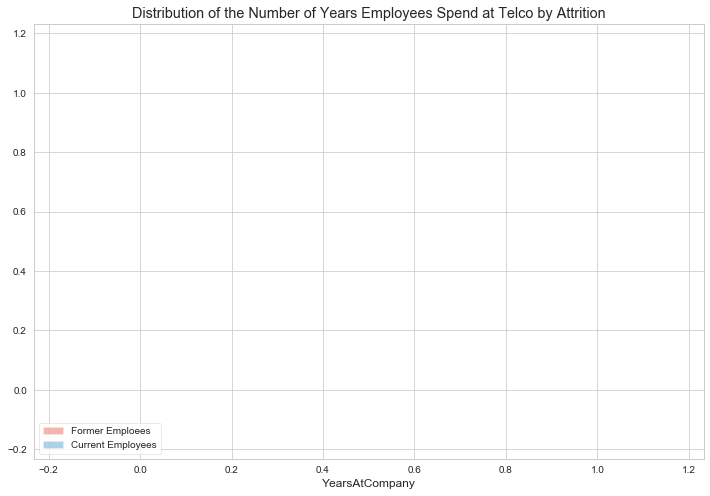

In [39]:
# Plot the distribution of Years at Company by Attrition
plt.figure(figsize=(12,8))
plt.title('Distribution of the Number of Years Employees Spend at Telco by Attrition')
#sns.distplot(hr.YearsAtCompany, bins = np.linspace(0,40,40))
sns.distplot(hr.YearsAtCompany[hr.Attrition == 'Former Employees'], bins = np.linspace(0,40,40))
sns.distplot(hr.YearsAtCompany[hr.Attrition == 'Current Employees'], bins = np.linspace(0,40,40))
plt.legend(['Former Emploees','Current Employees'])

C:\Users\Shubham\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Shubham\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


ValueError: No data; `observed` has size 0.

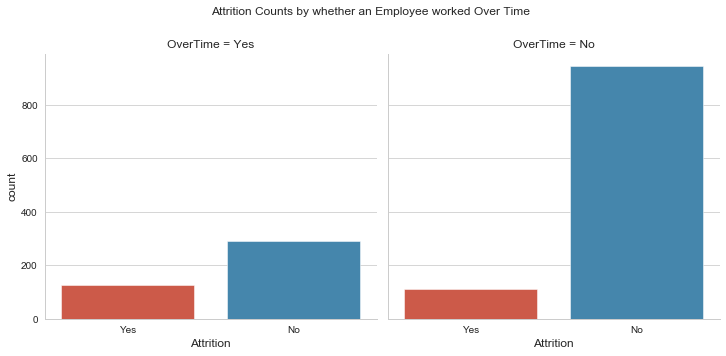

In [40]:
# Plot out the counts of OverTime
sns.factorplot("Attrition", col="OverTime", data=hr, kind="count", col_wrap=2, size=5)
plt.subplots_adjust(top=.85)
plt.suptitle('Attrition Counts by whether an Employee worked Over Time')


res_1 = hr.OverTime[hr.Attrition == 'Current Employees'].value_counts()
res_2 = hr.OverTime[hr.Attrition == 'Former Employees'].value_counts()
obs = np.array([res_1, res_2])
stats.chi2_contingency(obs)

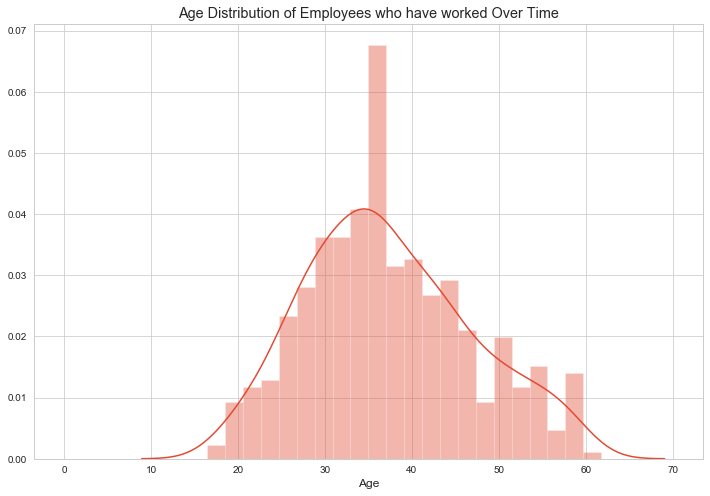

In [41]:

plt.figure(figsize=(12,8))
plt.title('Age Distribution of Employees who have worked Over Time')

sns.distplot(hr.Age[hr.OverTime == 'Yes'], bins = np.linspace(0,70,35))


60.0

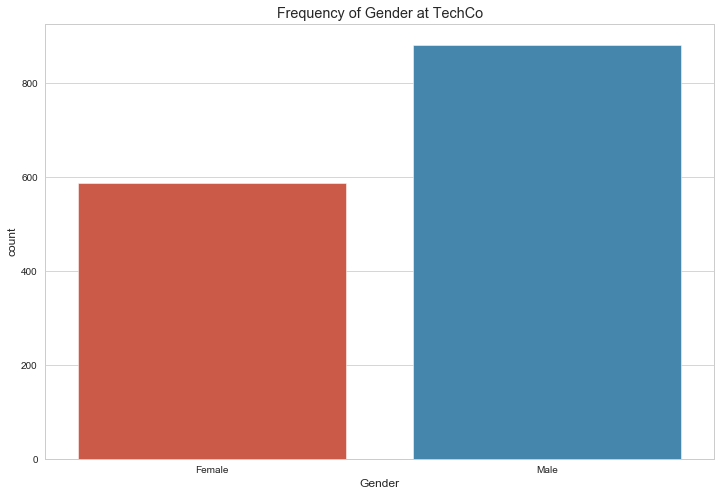

In [42]:
plt.figure(figsize=(12,8))
sns.countplot(x="Gender", data=hr)
# Proportion of males
plt.title('Frequency of Gender at TechCo')
hr['Gender'].value_counts().Male/hr['Gender'].count()*100

   Gender Attrition  percentage
0  Female  No        85.204082 
2  Male    No        82.993197 
1  Female  Yes       14.795918 
3  Male    Yes       17.006803 


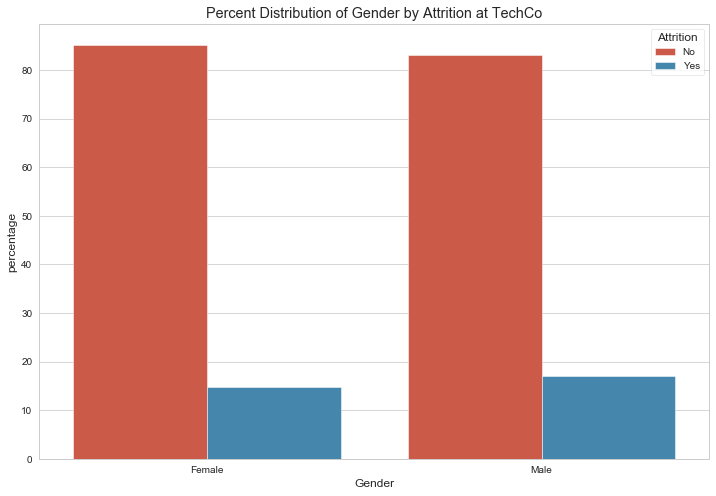

In [43]:
# First lets cast these string columns into categories
cats = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
for col in cats:
    hr[col] = hr[col].astype('category')

group_hr = hr.groupby(cats)


plt.figure(figsize=(12,8))

attrition_counts = (hr.groupby(['Gender'])['Attrition']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Attrition'))
plt.title('Percent Distribution of Gender by Attrition at TechCo')
sns.barplot(x="Gender", y="percentage", hue="Attrition", data=attrition_counts)


print(attrition_counts)
                    

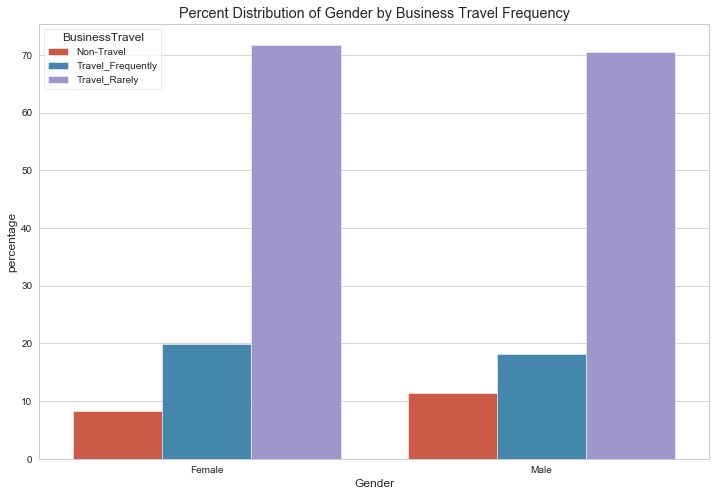

In [44]:

plt.figure(figsize=(12,8))

attrition_counts = (hr.groupby(['Gender'])['BusinessTravel']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('BusinessTravel'))
plt.title('Percent Distribution of Gender by Business Travel Frequency')
sns.barplot(x="Gender", y="percentage", hue="BusinessTravel", data=attrition_counts) 



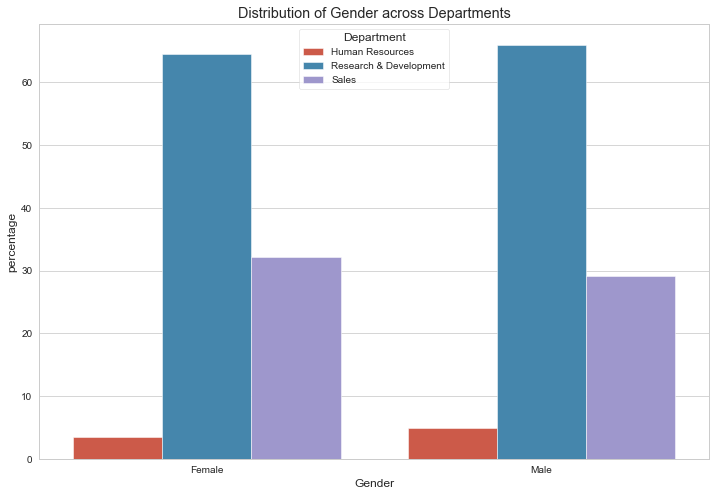

In [45]:

plt.figure(figsize=(12,8))

attrition_counts = (hr.groupby(['Gender'])['Department']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Department'))
plt.title('Distribution of Gender across Departments')
sns.barplot(x="Gender", y="percentage", hue="Department", data=attrition_counts) 

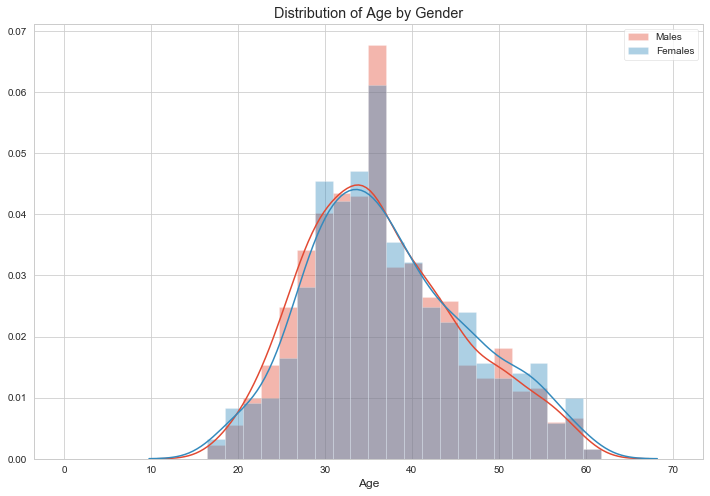

In [46]:
# Plot the distribution of age by gender
plt.figure(figsize=(12,8))
sns.distplot(hr.Age[hr.Gender == 'Male'], bins = np.linspace(0,70,35))
sns.distplot(hr.Age[hr.Gender == 'Female'], bins = np.linspace(0,70,35))
plt.title('Distribution of Age by Gender')
plt.legend(['Males','Females'])

Ttest_indResult(statistic=-1.2212617308870655, pvalue=0.22218303455087898)


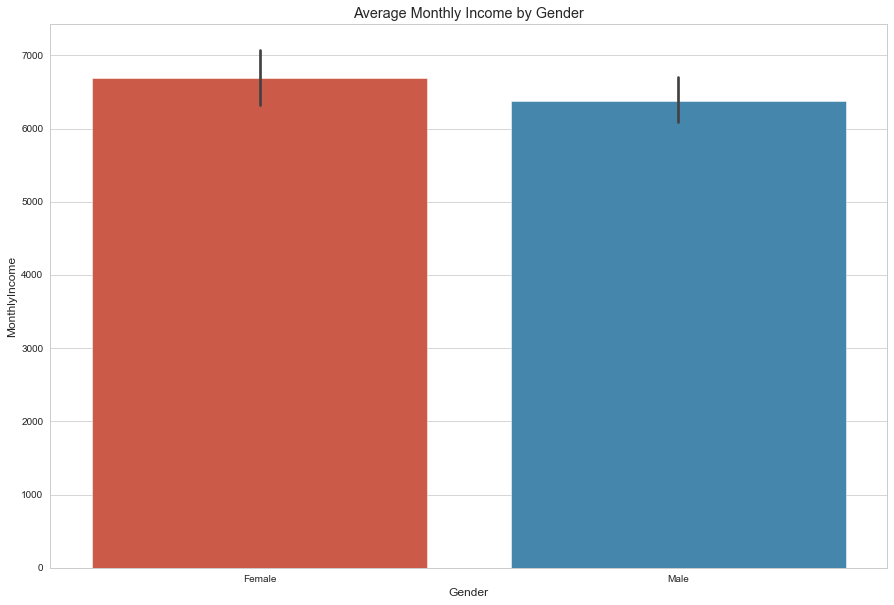

In [47]:

plt.figure(figsize=(15,10))
plt.title('Average Monthly Income by Gender')
sns.barplot(x="Gender", y="MonthlyIncome", data=hr)

# T-Test
cat1 = hr[hr['Gender']=='Male']
cat2 = hr[hr['Gender']=='Female']

print(stats.ttest_ind(cat1['MonthlyIncome'], cat2['MonthlyIncome']))

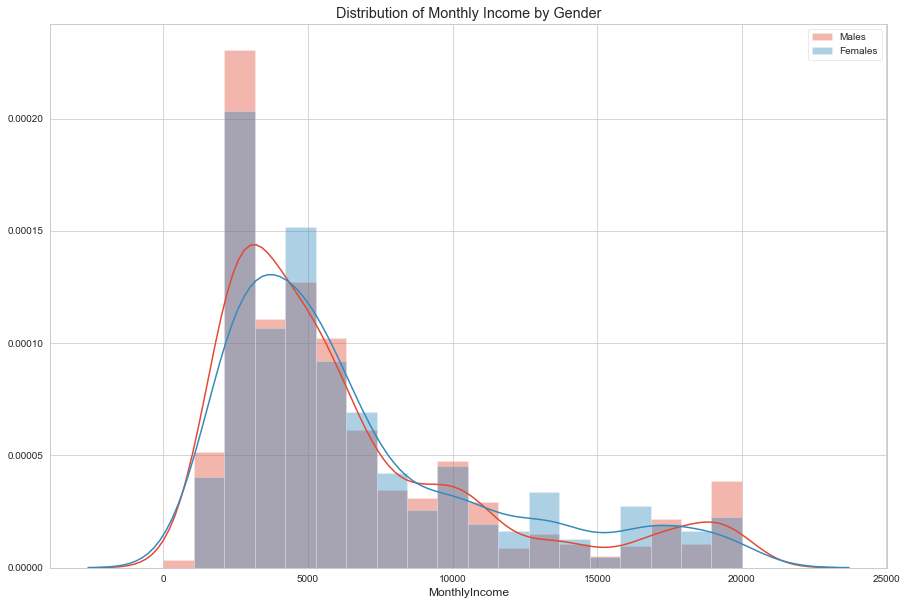

In [48]:
plt.figure(figsize=(15,10))
plt.title('Distribution of Monthly Income by Gender')
sns.distplot(hr.MonthlyIncome[hr.Gender == 'Male'], bins = np.linspace(0,20000,20))
sns.distplot(hr.MonthlyIncome[hr.Gender == 'Female'], bins = np.linspace(0,20000,20))
plt.legend(['Males','Females'])

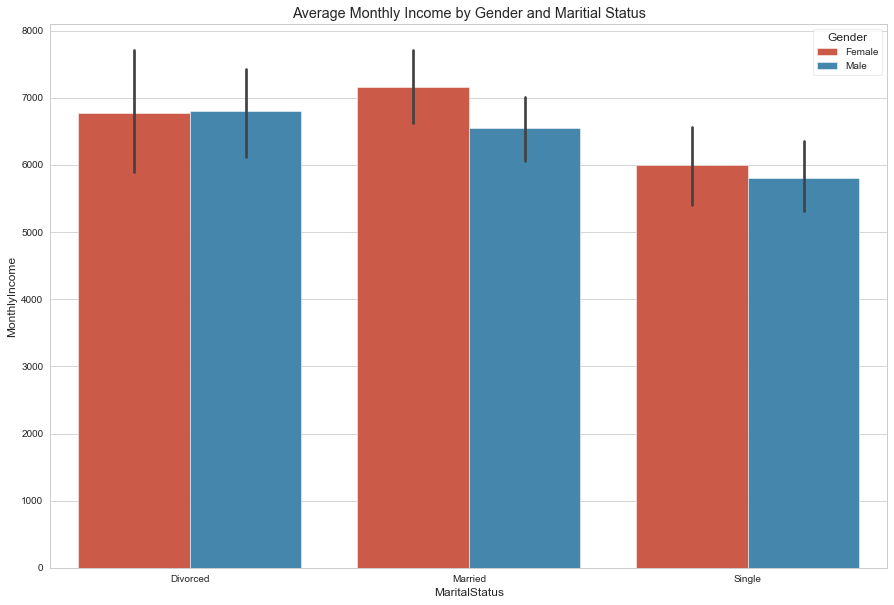

In [49]:
# What about all the single ladies?
plt.figure(figsize=(15,10))
plt.title('Average Monthly Income by Gender and Maritial Status')
sns.barplot(x="MaritalStatus", y="MonthlyIncome", hue="Gender", data=hr)

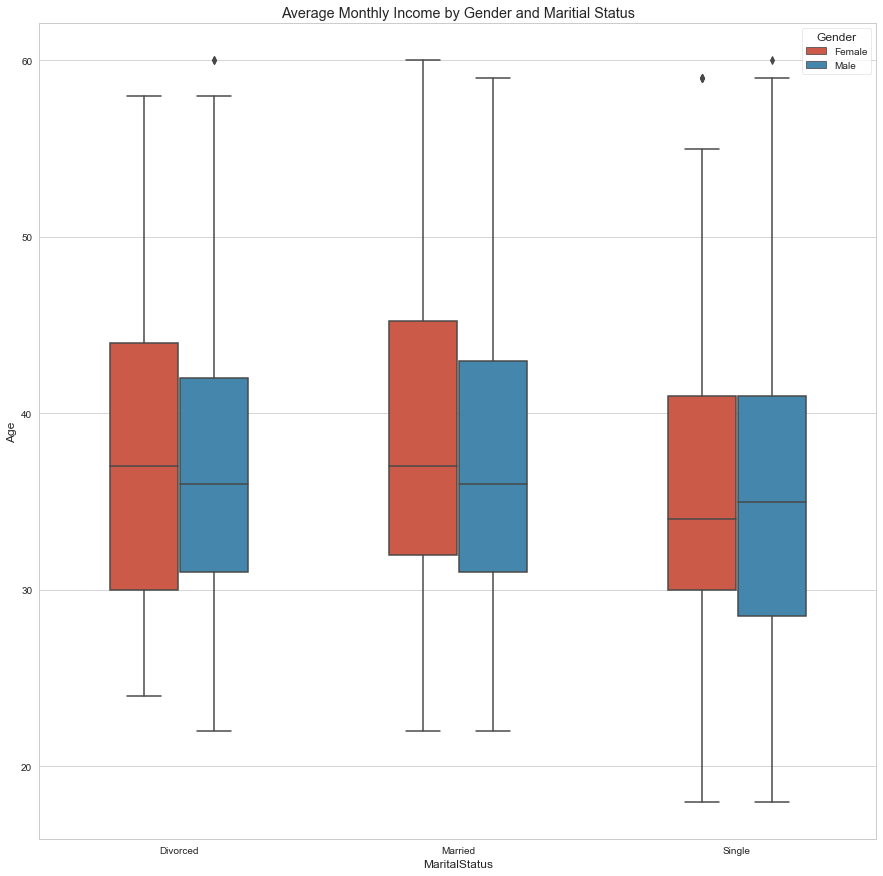

In [50]:
# Age by Gender and Martial Status 
plt.figure(figsize=(15,15))
plt.title('Average Monthly Income by Gender and Maritial Status')
sns.boxplot(x="MaritalStatus", y="Age", hue="Gender", data=hr, width=.5)

                Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1  \
Age                                                                          
(17.999, 25.0]  709.780488  709.780488    709.780488      709.780488         
(25.0, 35.0]    738.925743  738.925743    738.925743      738.925743         
(35.0, 50.0]    753.222408  753.222408    753.222408      753.222408         
(50.0, 70.0]    658.713287  658.713287    658.713287      658.713287         

                Unnamed: 0.1.1.1.1        Age   DailyRate  DistanceFromHome  \
Age                                                                           
(17.999, 25.0]  709.780488          22.406504  773.016260  9.268293           
(25.0, 35.0]    738.925743          30.988449  802.376238  9.363036           
(35.0, 50.0]    753.222408          41.697324  809.897993  9.080268           
(50.0, 70.0]    658.713287          54.601399  797.300699  8.874126           

                Education  EnvironmentSatisfaction  Hour

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age Bracket
Age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(17.999, 25.0]",709.780488,709.780488,709.780488,709.780488,709.780488,22.406504,773.016260,9.268293,2.024390,2.682927,65.512195,2.804878,1.186992,2.731707,2972.886179,14950.691057,1.317073,15.268293,3.154472,2.699187,0.585366,3.130081,2.910569,2.845528,2.479675,1.569106,0.731707,1.495935,18-25
"(25.0, 35.0]",738.925743,738.925743,738.925743,738.925743,738.925743,30.988449,802.376238,9.363036,2.922442,2.754125,65.316832,2.681518,1.678218,2.739274,4895.633663,14307.325083,2.127063,15.174917,3.151815,2.702970,0.787129,7.648515,2.803630,2.744224,5.986799,4.052805,1.750825,3.905941,26-35
"(35.0, 50.0]",753.222408,753.222408,753.222408,753.222408,753.222408,41.697324,809.897993,9.080268,3.020067,2.685619,66.724080,2.757525,2.406355,2.709030,7884.083612,13757.593645,3.264214,15.182274,3.152174,2.687291,0.854515,14.197324,2.762542,2.792642,8.322742,4.735786,2.673913,4.725753,36-50
"(50.0, 70.0]",658.713287,658.713287,658.713287,658.713287,658.713287,54.601399,797.300699,8.874126,3.188811,2.769231,65.167832,2.755245,3.020979,2.762238,10574.881119,16112.216783,3.888112,15.419580,3.167832,2.867133,0.748252,21.475524,2.839161,2.629371,9.734266,5.146853,3.258741,4.783217,51-70


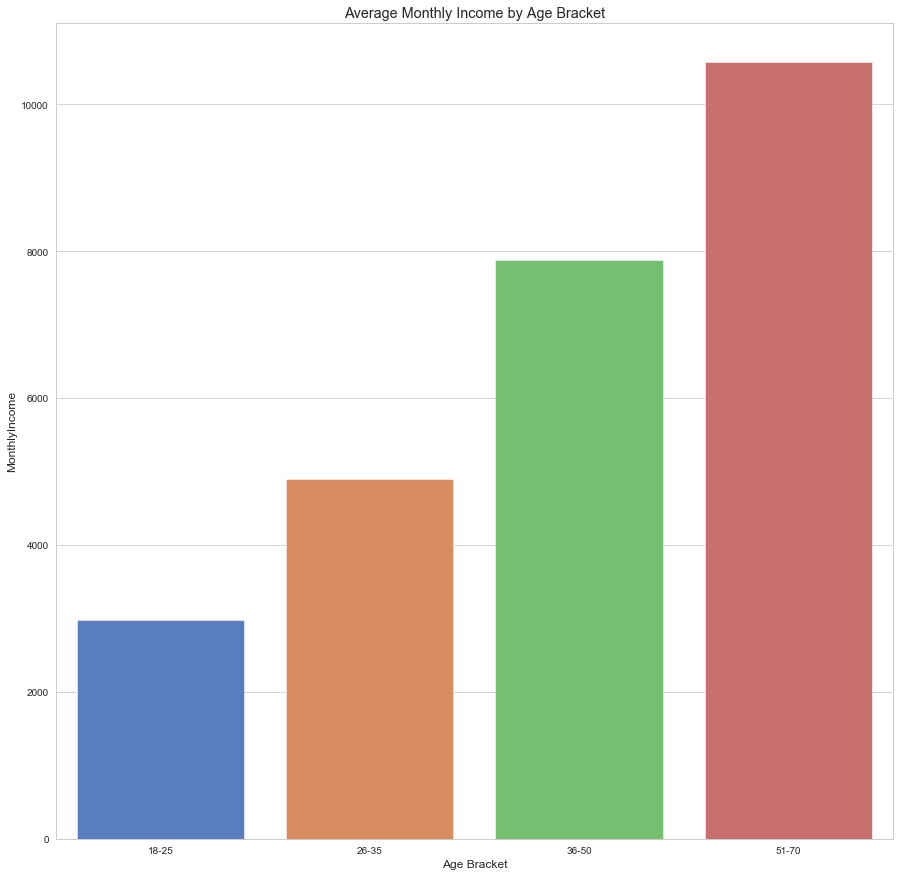

In [51]:

plt.figure(figsize=(15,15))
bins=[18, 25, 35, 50, 70]
out = hr.groupby(pd.cut(hr['Age'], bins=bins, include_lowest=True)).aggregate(np.mean)
print(out.head())

out['Age Bracket'] = ['18-25', '26-35', '36-50', '51-70']


plt.title('Average Monthly Income by Age Bracket')
sns.barplot('Age Bracket', 'MonthlyIncome', data=out, palette="muted")
out.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Years at Company Bracket
YearsAtCompany,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(-0.001, 10.0]",736.288399,736.288399,736.288399,736.288399,736.288399,36.032680,806.697712,9.271242,2.892974,2.722222,65.999183,2.742647,1.852124,2.730392,5621.844771,14374.884804,2.740196,15.200163,3.148693,2.700163,0.796569,9.477941,2.799020,2.756536,4.814542483660131,3.183007,1.411765,3.107843,0-10
"(10.0, 20.0]",753.038889,753.038889,753.038889,753.038889,753.038889,39.355556,801.655556,9.083333,3.027778,2.738889,64.894444,2.700000,2.700000,2.755556,9009.138889,14231.000000,2.572222,15.538889,3.200000,2.694444,0.800000,17.661111,2.766667,2.805556,15.066666666666666,9.577778,5.294444,9.166667,11-20
"(20.0, 30.0]",666.660000,666.660000,666.660000,666.660000,666.660000,44.800000,761.800000,8.000000,2.760000,2.600000,66.380000,2.660000,4.220000,2.600000,15817.760000,12573.180000,2.480000,14.640000,3.140000,2.960000,0.760000,24.980000,2.920000,2.640000,23.2,9.000000,8.280000,9.240000,21-30
"(30.0, 40.0]",601.125000,601.125000,601.125000,601.125000,601.125000,53.125000,616.750000,8.125000,3.625000,2.875000,67.312500,2.312500,4.375000,2.687500,16602.375000,15947.750000,1.125000,14.000000,3.062500,3.062500,0.625000,34.500000,2.812500,3.000000,33.5625,9.187500,7.562500,9.062500,31-40


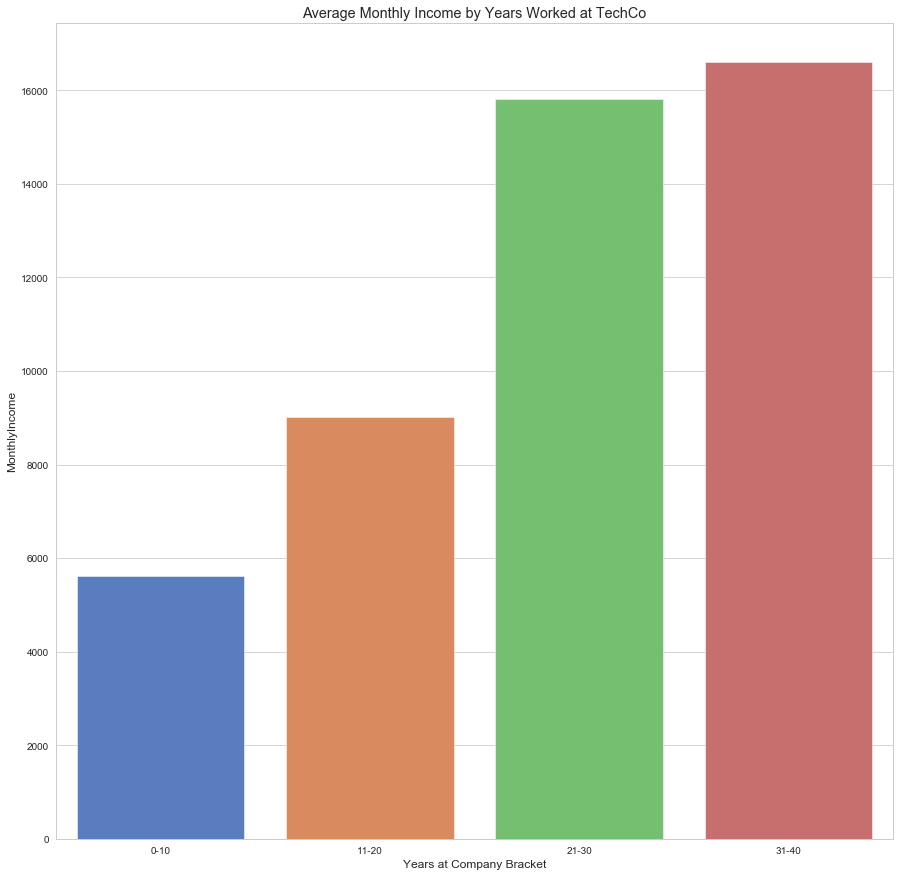

In [52]:

plt.figure(figsize=(15,15))
bins=[0, 10, 20, 30, 40]
out = hr.groupby(pd.cut(hr['YearsAtCompany'], bins=bins, include_lowest=True)).aggregate(np.mean)
out[['YearsAtCompany']] = out[['YearsAtCompany']].applymap(str)
out['Years at Company Bracket'] = ['0-10', '11-20', '21-30', '31-40']


plt.title('Average Monthly Income by Years Worked at TechCo')
sns.barplot('Years at Company Bracket', 'MonthlyIncome', data=out, palette="muted")
out.head()

C:\Users\Shubham\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x1080 with 0 Axes>

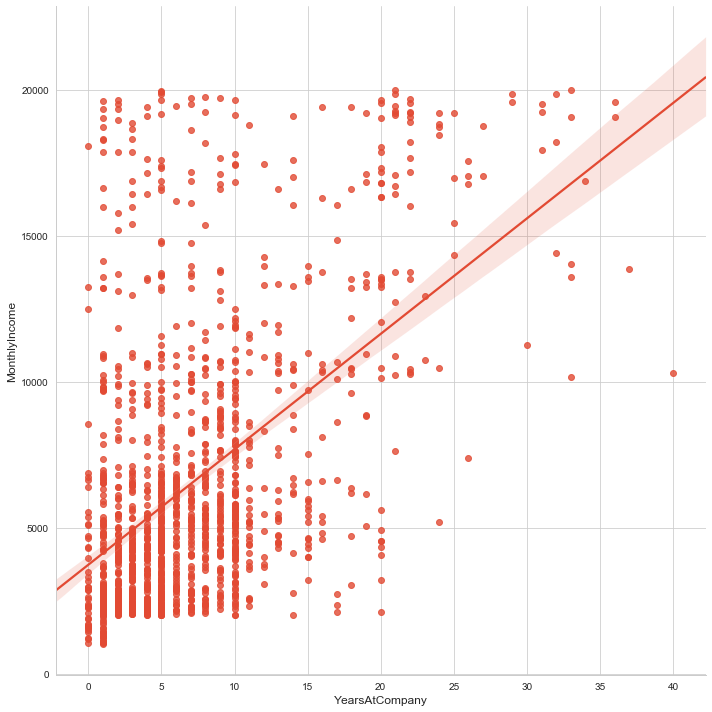

In [53]:
plt.figure(figsize=(15,15))
sns.lmplot("YearsAtCompany", "MonthlyIncome", data=hr, size=10) 

In [54]:
hr["Attrition"].value_counts() 

No     1233
Yes    237 
Name: Attrition, dtype: int64

In [55]:
!pip install sklearn-pandas

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn_pandas import DataFrameMapper, gen_features, cross_val_score


cat_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
feature_def = gen_features(
    columns= cat_cols,
    classes=[LabelEncoder]
)
mapper = DataFrameMapper(feature_def)
hr[cat_cols] = mapper.fit_transform(hr)
hr.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,0,0,0,41,1,2,1102,2,1,2,1,2,0,94.0,3,2,7,4.0,2,5993.0,19479,8,1,11.0,3,1,0,8,0,1,6,4,0,5
1,1,1,1,1,1,49,0,1,279,1,8,1,1,3,1,61.0,2,2,6,2.0,1,5130.0,24907,1,0,23.0,4,4,1,10,3,3,10,7,1,7
2,2,2,2,2,2,37,1,2,1373,1,2,2,4,4,1,92.0,2,1,2,3.0,2,2090.0,2396,6,1,15.0,3,2,0,7,3,3,0,0,0,0
3,3,3,3,3,3,33,0,1,1392,1,3,4,1,4,0,56.0,3,1,6,3.0,1,2909.0,23159,1,1,11.0,3,3,0,8,3,3,8,7,3,0
4,4,4,4,4,4,27,0,2,591,1,2,1,3,1,1,40.0,3,1,2,2.0,1,3468.0,16632,9,0,12.0,3,4,1,6,3,3,2,2,2,2


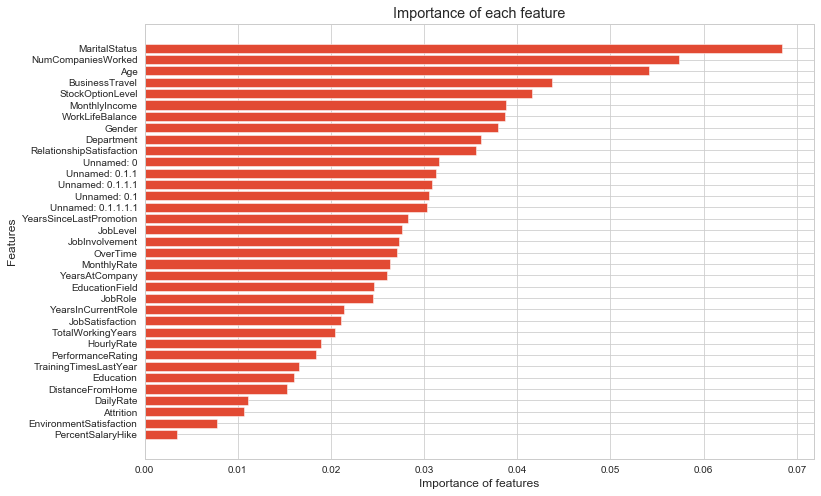

In [57]:
# Build a forest to predict attrition and compute the feature importances
rf = RandomForestClassifier(class_weight="balanced", n_estimators=500) 
rf.fit(hr.drop(['Attrition'],axis=1), hr.Attrition)
importances = rf.feature_importances_
names = hr.columns
importances, names = zip(*sorted(zip(importances, names)))

# Lets plot this
plt.figure(figsize=(12,8))
plt.barh(range(len(names)), importances, align = 'center')
plt.yticks(range(len(names)), names)
plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

In [58]:
# Make predictions using 10-K-Fold-CV

# Baseline:
print((hr.Attrition.value_counts()/(hr.shape[0]))*100)

# Accuracy
scores = cross_val_score(rf, hr.drop(['Attrition'],axis=1), hr.Attrition, cv=10, scoring='accuracy')
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# ROC
scores = cross_val_score(rf, hr.drop(['Attrition'],axis=1), hr.Attrition, cv=10, scoring='roc_auc')
print(scores)
print("ROC_AUC: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

0    83.877551
1    16.122449
Name: Attrition, dtype: float64
[0.83108108 0.83783784 0.84459459 0.85034014 0.8707483  0.85034014
 0.83673469 0.87671233 0.84931507 0.84246575]
Accuracy: 0.85 (+/- 0.03)
[0.72110215 0.82762097 0.85030242 0.7325542  0.84214092 0.7427168
 0.74119241 0.72163309 0.84623542 0.80222694]
ROC_AUC: 0.78 (+/- 0.11)


In [59]:
from sklearn.decomposition import PCA

# Normalise PCA as it can have a large effect on the result then fit
std_clf = make_pipeline(StandardScaler(), PCA())
std_clf.fit(hr.drop(['Attrition'], axis=1))
existing_2d = std_clf.transform(hr.drop(['Attrition'],axis=1))

In [60]:
pca_std = std_clf.named_steps['pca']
print(pca_std.explained_variance_ratio_.cumsum())

[0.14398418 0.27753613 0.33165604 0.3831761  0.43131849 0.47688566
 0.51039182 0.54311255 0.57508364 0.60578331 0.63617104 0.66533989
 0.69404906 0.72218344 0.75010034 0.77763321 0.80467227 0.83054767
 0.85581235 0.88060754 0.90473957 0.92589784 0.94127528 0.95609628
 0.96541986 0.97452171 0.98248653 0.98890511 0.99464919 0.99867705
 1.         1.         1.         1.         1.        ]


<Figure size 1152x576 with 0 Axes>

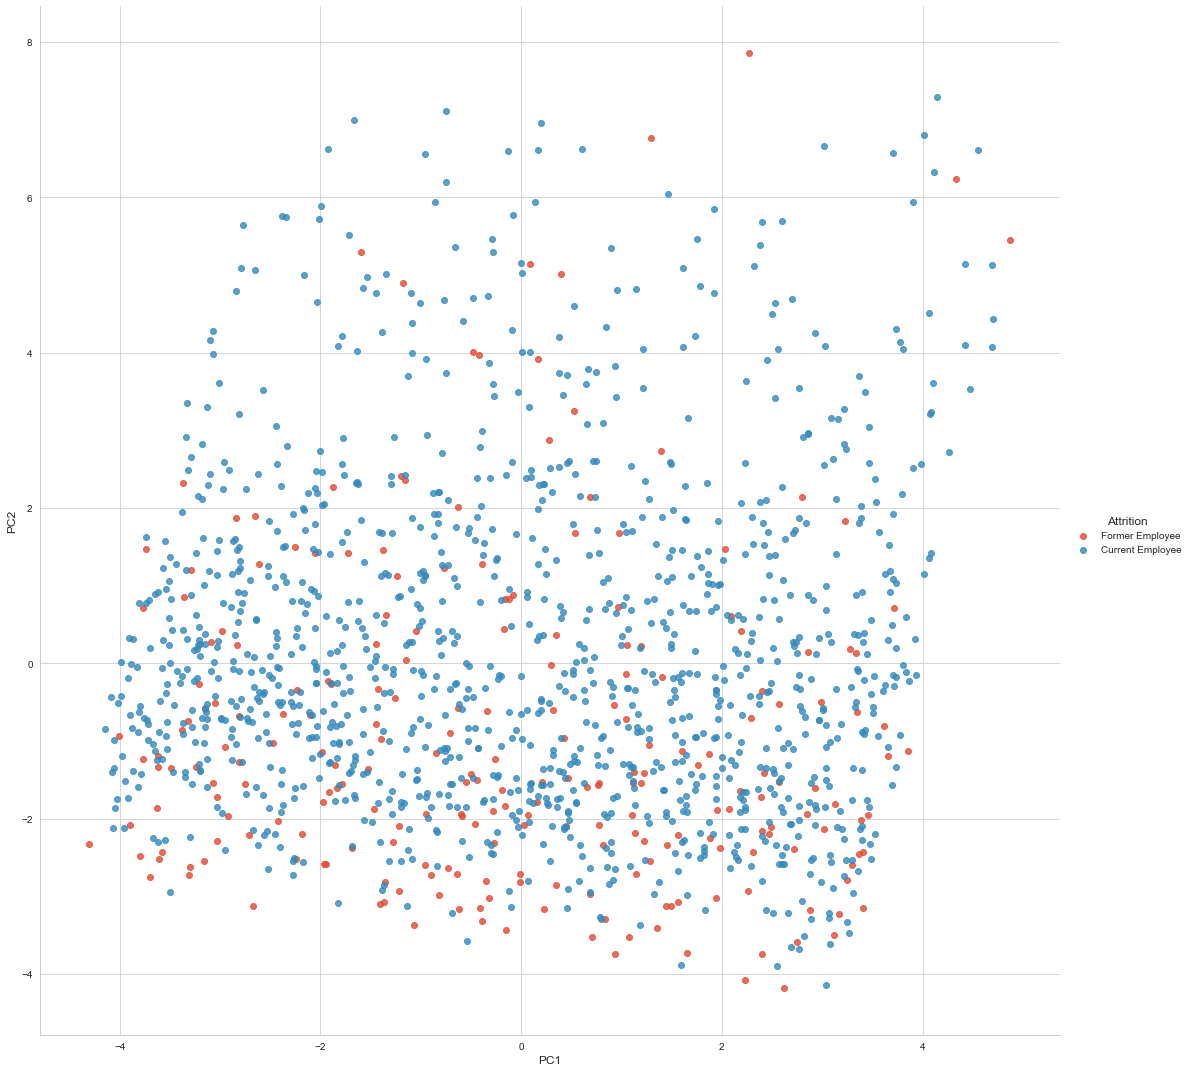

In [62]:
existing_hr_2d = pd.DataFrame(existing_2d)
existing_hr_2d = pd.concat([existing_hr_2d, hr[['Attrition']]], axis = 1)
existing_hr_2d.columns = ['PC' + str(i) for i in range(1, existing_hr_2d.shape[1])] + ['Attrition']
di = {0.0: "Current Employee", 1.0: "Former Employee"}
existing_hr_2d = existing_hr_2d.replace({"Attrition":di})
#ax = existing_hr_2d.plot(kind='scatter', x='PC1', y='PC2', figsize=(16,8))

# Plot with Seaborn
plt.figure(figsize=(16,8))
sns.lmplot("PC1", "PC2", data=existing_hr_2d, hue='Attrition', fit_reg=False, size=15)

In [63]:
from sklearn.externals import joblib
joblib.dump(PCA,"HR_Data_Analytics.pkl")

C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['HR_Data_Analytics.pkl']